<a href="https://colab.research.google.com/github/hanhluukim/replication-topic-modelling-in-embedding-space/blob/main/notebook_replication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Das Projekt aus dem Github klonen und in den Projektsordner**

In [1]:
#wenn die Ordner noch nicht geklont ist, soll dieser Fehler zuerst durchgeführt werden.
!git clone https://github.com/hanhluukim/replication-topic-modelling-in-embedding-space.git

Cloning into 'replication-topic-modelling-in-embedding-space'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 313 (delta 53), reused 54 (delta 23), pack-reused 225
Receiving objects: 100% (313/313), 4.62 MiB | 12.39 MiB/s, done.
Resolving deltas: 100% (163/163), done.


In [2]:
cd /content/replication-topic-modelling-in-embedding-space

/content/replication-topic-modelling-in-embedding-space


#**Die benötige Paketen für das Projekt mittels requirements.txt installieren**



In [3]:
# Falls die Packages noch nicht installiert wurden, 
!pip install -r "/content/replication-topic-modelling-in-embedding-space/requirements.txt"

     |████████████████████████████████| 4.0 MB 28.4 MB/s 
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 28.8 MB 74.7 MB/s 
     |████████████████████████████████| 636 kB 47.7 MB/s 
     |████████████████████████████████| 79.9 MB 1.2 MB/s 
     |████████████████████████████████| 6.6 MB 48.7 MB/s 
     |████████████████████████████████| 880 kB 62.1 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 1.1 MB 26.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=16ce204c72ee1b195aa46c8d95a69cb65c526ee93d63dbc6feb5cf60db9eba4b
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=bd9d61c3cd6ca00de407a8399731e6f084005298af9e40a73fbcc9efe6079e1e
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/

# **Gebrauchte Paketen importieren**

In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import umap.umap_ as umap
import time
import plotly.express as px
from sklearn import cluster
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# **Vorverarbeitung und BOW-Repräsentationen für Textdaten durchführen**
1. Vocabular erstellen
2. BOW-Repräsentationen für allen Teildatensätzen

In [5]:
from src.preprare_dataset import TextDataLoader

In [6]:
# init TextDataLoader für die Datenquelle 20 News Groups
# Daten abrufen vom Sklearn, tokenisieren und besondere Charaktern entfernen
textsloader = TextDataLoader(source="20newsgroups", train_size=None, test_size=None)
textsloader.load_tokenize_texts("20newsgroups")
# Beispiel von Textdaten
textsloader.show_example_raw_texts(n_docs=2)

loading texts: ...
finished load!
check some sample texts of the dataset
['From', ':', 'lerxst', '@', 'wam', '.', 'umd', '.', 'edu', '(', "where's", 'my', 'thing', ')', 'Subject', ':', 'WHAT', 'car', 'is', 'this', '!', '?', 'Nntp', 'Posting', 'Host', ':', 'rac3', '.', 'wam', '.', 'umd', '.', 'edu', 'Organization', ':', 'University', 'of', 'Maryland', ',', 'College', 'Park', 'Lines', ':', '15', 'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2', 'door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s', '/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors', 'were', 'really', 'small', '.', 'In', 'addition', ',', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', '.', 'This', 'is', 'all', 'I', 'know', '.', 'If', 'anyone', 'can', 'tellme', 'a', 'model', 'name', ',', 'engine', 'specs'

In [7]:
# Vorverarbeitung von Daten mit folgenden Schritten:
textsloader.preprocess_texts(length_one_remove=True, punctuation_lower = True, stopwords_filter = True)

start: preprocessing: ...
finised: preprocessing!


In [8]:
# Daten zerlegen für Train, Test und Validation. Erstellen Vocabular aus dem Trainset
textsloader.split_and_create_voca_from_trainset(max_df=0.7, min_df=10, stopwords_remove_from_voca=True)

start creating vocabulary ...
length of the vocabulary: 348
sample ten words of the vocabulary: ['engineering', 'computer', 'dept', 'left', 'center', 'buy', 'word', 'steve', 'major', 'bit']
length word2id list: 348
length id2word list: 348
finished: creating vocabulary


In [9]:
# Erstellen BOW-Repräsentation für ETM Modell
for_lda_model = False 
word2id, id2word, train_set, test_set, val_set = textsloader.create_bow_and_savebow_for_each_set(for_lda_model=for_lda_model)

length train-documents-indices : 4561
length of the vocabulary: 348


start: creating bow representation...
top 10 - word-id of the doc: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
max word-id: 347
min word-id: 0
max doc-id: 149
min doc-id: 0
all docs: 4561
all words: 4561
docidx unique 150
words unique: 348
ndocs: 150
vocab-size: 348
finised creating bow input!

start: creating bow representation...
top 10 - word-id of the doc: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
max word-id: 347
min word-id: 0
max doc-id: 49
min doc-id: 0
all docs: 1555
all words: 1555
docidx unique 50
words unique: 326
ndocs: 50
vocab-size: 348
finised creating bow input!

start: creating bow representation...
top 10 - word-id of the doc: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max word-id: 346
min word-id: 1
max doc-id: 24
min doc-id: 0
all docs: 797
all words: 797
docidx unique 25
words unique: 263
ndocs: 25
vocab-size: 348
finised creating bow input!

start: creating bow representation...
top 10 - word-id of the doc: [0, 1, 3, 4, 5, 7, 9,

# **Vocabular und IDs anzeigen als Beispiel**

---





In [10]:
# show for samples: 100 word2id and id2 word
word2id_df_100 = pd.DataFrame()
word2id_df_100['word'] = list(word2id.keys())[:100]
word2id_df_100['id'] = list(word2id.values())[:100]
word2id_df_100

,word,id
0,engineering,0
1,computer,1
2,dept,2
3,left,3
4,center,4
...,...,...
95,read,95
96,car,96
97,hold,97
98,problems,98


# **Die Größe von Datensätzen kontrollieren**

In [11]:
# Kontrollieren die Größen von verschiedenen Datensätzen
print(f'Size of the vocabulary after prprocessing ist: {len(textsloader.vocabulary)}')
print(f'Size of train set: {len(train_set["tokens"])}')
print(f'Size of val set: {len(val_set["tokens"])}')
print(f'Size of test set: {len(test_set["test"]["tokens"])}')

Size of the vocabulary after prprocessing ist: 348
Size of train set: 150
Size of val set: 100
Size of test set: 50


# **Dokumenten wiederstellen für Word2Vec Embedding**

---



In [12]:
# re-erstellen von Dokumenten nach der Vorverarbeitungen. Die Dokumenten sind in Wörtern und werden für Word-Embedding Training benutzt
docs_tr, docs_t, docs_v = textsloader.get_docs_in_words_for_each_set()
train_docs_df = pd.DataFrame()
train_docs_df['text-after-preprocessing'] = [' '.join(doc) for doc in docs_tr[:100]]
train_docs_df

,text-after-preprocessing
0,sale corporation distribution nntp posting hos...
1,windows line reply windows line pc line window...
2,cs reply world message apr originator cs nntp ...
3,computer systems division distribution world n...
4,required systems laboratory distribution usa a...
...,...
95,university newsreader tin version mike cc wrot...
96,washington guy memory university washington nn...
97,day article reply distribution world article c...
98,state software nntp posting host state state u...


# **Word-Embedding trainieren mit dem Traindatensatz**

In [13]:
from src.embedding import WordEmbeddingCreator
save_path = Path.joinpath(Path.cwd(), "vocab_embedding.txt")
wb_creator = WordEmbeddingCreator(model_name="cbow", documents = docs_tr, save_path= save_path)
wb_creator.train(min_count=0, embedding_size= 10)
vocab = list(word2id.keys())
wb_creator.create_and_save_vocab_embedding(vocab, save_path)

word-embedding train begins
word-embedding train finished
length of vocabulary from word-embedding model 348
length of the vocabulary of prepraring-dataset-vocabulary: 348


100%|██████████| 348/348 [00:00<00:00, 31351.87it/s]


True

In [14]:
v = list(wb_creator.model.wv.vocab)[0]
vec = list(wb_creator.model.wv.__getitem__(v))
print(f'word-embedding of the word-- {v}: ')
print(f'vector: {vec}')
print(f'dim of vector: {len(vec)}')

word-embedding of the word-- sale: 
vector: [-0.049709663, -0.041012865, 0.052273255, -0.013403522, 0.024686739, -0.0043096845, -0.0047836527, -0.03332941, 0.022274528, -0.041171346]
dim of vector: 10


# **Word-Embeddings visualieren als Beispiel**


In [15]:
# read word-embedding files
with open(save_path) as f:
  lines = f.readlines()
embedding_data = []
words_data = []
for t in lines:
  w = t.split("\t")[0]
  v = [float(e) for e in t.split("\t")[1].split(" ")]
  words_data.append(w)
  embedding_data.append(v)

In [16]:
# clustering words with KMeans and Words-Vectors
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(embedding_data)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)

Cluster id labels for inputted data
[3 8 2 9 7 5 1 3 6 8 1 9 1 1 4 8 2 9 4 0 8 3 9 4 9 7 7 2 3 2 5 5 6 6 1 1 2
 4 4 1 9 4 5 4 9 4 6 8 5 2 9 4 6 6 1 8 8 4 1 8 8 3 9 1 5 2 8 0 4 5 9 3 6 9
 4 0 6 1 0 1 3 6 1 3 7 4 8 4 8 4 8 0 4 6 8 5 2 2 8 7 4 4 3 9 2 3 3 9 9 7 8
 4 4 9 9 1 4 0 9 4 6 5 9 3 4 1 8 9 6 0 4 8 2 2 6 6 3 6 6 8 1 6 6 4 9 6 4 0
 9 1 1 8 5 2 5 4 4 0 8 0 0 4 0 4 8 6 9 2 4 1 0 4 9 7 9 1 0 2 7 6 8 8 1 1 1
 1 8 2 9 4 2 4 3 1 8 4 9 4 9 6 6 1 3 1 3 3 0 8 8 5 8 4 3 6 0 5 8 8 8 0 9 6
 8 6 9 0 3 9 5 9 6 6 8 5 8 6 8 3 4 4 4 4 8 3 6 1 1 1 4 9 8 3 8 6 8 1 4 6 7
 0 8 0 4 5 4 9 8 8 0 0 1 0 4 8 6 3 2 6 4 1 5 0 3 2 6 6 3 4 8 0 6 2 3 4 1 8
 8 0 9 1 4 9 6 0 2 6 1 9 4 2 9 4 6 4 4 3 9 1 0 0 6 3 8 5 3 6 9 3 9 6 6 1 6
 1 1 6 2 6 3 2 0 5 0 6 3 3 1 0]
Centroids data
[[-1.23607045e-01 -1.71837481e-02 -1.34354138e-02  9.74559663e-03
   3.79654279e-02  4.84658094e-04  4.33758833e-02  9.72691284e-03
  -3.28201787e-03 -1.05894539e-02]
 [-2.18011953e-01 -3.50844598e-02  5.59736544e-03 -1.63410166e-03
   4.6009

In [17]:
# dimension reduction with umap
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(embedding_data)
print('Duration: {} seconds'.format(time.time() - start))

# show samples after dim-reduction in dataframe
wb = pd.DataFrame(embedding, columns=['x', 'y', 'z'])
wb['word'] = words_data
wb['cluster'] = ['cluster ' + str(c) for c in labels]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Duration: 15.641063451766968 seconds


In [18]:
# visualization
fig = px.scatter_3d(wb, 
                    text = wb['word'],
                    x='x', y='y', z='z',
                    color = wb['cluster'],
                    title ="word-embedding-samples")
fig.show()

# **ETM-Model trainieren**

In [19]:
# using DocSet to use easier the modul DataSet from torch
from src.train_etm import DocSet, ETMTrain
from src.etm import ETM

vocab_size = len(list(word2id.keys()))
tr_set = DocSet("train", vocab_size, train_set)
print(len(tr_set))
print(tr_set.__getitem__(0))

150
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 

1000
adam
Epoch: 0/1000  -  Loss: 29.656722310384115
Epoch: 1/1000  -  Loss: 29.65573181152344
Epoch: 2/1000  -  Loss: 29.65271280924479
Epoch: 3/1000  -  Loss: 29.651862182617183
Epoch: 4/1000  -  Loss: 29.651345520019532
Epoch: 5/1000  -  Loss: 29.651809844970703
Epoch: 6/1000  -  Loss: 29.650133310953773
Epoch: 7/1000  -  Loss: 29.647878417968744
Epoch: 8/1000  -  Loss: 29.647778803507485
Epoch: 9/1000  -  Loss: 29.64680501302083
Epoch: 10/1000  -  Loss: 29.644760437011715
Epoch: 11/1000  -  Loss: 29.64467264811198
Epoch: 12/1000  -  Loss: 29.644389750162762
Epoch: 13/1000  -  Loss: 29.643319295247398
Epoch: 14/1000  -  Loss: 29.64268900553385
Epoch: 15/1000  -  Loss: 29.64216140747071
Epoch: 16/1000  -  Loss: 29.640478566487626
Epoch: 17/1000  -  Loss: 29.640883890787762
Epoch: 18/1000  -  Loss: 29.63998339335124
Epoch: 19/1000  -  Loss: 29.640569966634118
Epoch: 20/1000  -  Loss: 29.63940612792969
Epoch: 21/1000  -  Loss: 29.639454650878907
Epoch: 22/1000  -  Loss: 29.639705251057

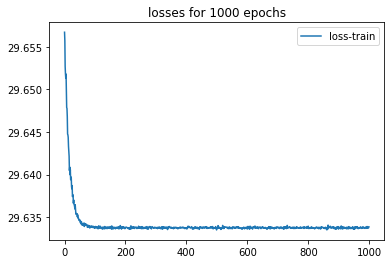

In [22]:
num_topics = 5
t_hidden_size = 100
rho_size = len(embedding_data[0])
emb_size = len(embedding_data[0])
theta_act = "relu"

class TrainArguments:
      def __init__(self, epochs, batch_size, log_interval):
          self.epochs = epochs
          self.batch_size = batch_size
          self.log_interval = log_interval

class OptimizerArguments:
      def __init__(self, optimizer_name, lr, wdecay):
            self.optimizer = optimizer_name
            self.lr = lr
            self.wdecay = wdecay
            
train_args = TrainArguments(epochs=1000, batch_size=6, log_interval=None)
optimizer_args = OptimizerArguments(optimizer_name="adam", lr=0.001, wdecay=0.1)

print(train_args.epochs)
print(optimizer_args.optimizer)

training_set = train_set

# define the ETM-model with setting-parameters
etm_model = ETM(
      num_topics, 
      vocab_size, 
      t_hidden_size, rho_size, emb_size, theta_act, 
      embedding_data, enc_drop=0.5)

# start training
train_class = ETMTrain().train(
    etm_model,
    vocab_size, 
    train_args, optimizer_args, training_set, 
    num_topics, t_hidden_size, rho_size, emb_size, theta_act, embedding_data, 0.5)